# 1. Nyquist-Kriterium und Matched-Filter

## 1. Nyquist-Kriterium

Die Datensymbolfolge $d[k]$ muss nun in ein analoges, d.h. zeit- und Wertekontinuierliches Signal $x(t)$ überführt werden. Dazu dient das Sendefilter, mit dessen Impulsantwort $g_S(t)$ die Datenfolge zu falten ist. Wir erhalten das analoge Signal

\begin{equation}
    x(t) = T_s d[i] \ast g_S(t) = T_s \sum_i d[i] \cdot g_s(t-iT_s) \; .
\end{equation}

Zusammen mit dem Empfangsfilter $g_E(t)$ muss die Gesamtimpulsantwort die 1. Nyquist-Bedingung 

\begin{equation}
    g(t) = g_{\mathrm{S}}(t) \ast g_{\mathrm{E}}(t) = 
    \begin{cases}
        \frac{1}{T_{\mathrm{s}}} & \text{für } t=0 \\
        0 & \text{für } t=i T_{\mathrm{s}} \text{ mit } i \in \mathbb{N} \setminus \{0\} \\
        \text{beliebig} & \text{sonst} 
     \end{cases}
\end{equation}

erfüllen. Zu den idealen Abtastzeitpunkten $t=i T_{\mathrm{s}}$ muss die Gesamtimpulsantwort außer im Urspruch Null sein. Zwischen den idealen Abtastzeitpunkten kann sie beliebige Werte annehmen. Wichtig ist, dass die 1. Nyquist-Bedingung nicht separat für Sende- oder Empfangsfilter erfüllt sein muss, sondern für die Gesamtimpulsantwort $g(t)$. Die Bedingung kann äquivalent auch im Frequenzbereich formuliert werden. Hier muss die Übertragungsfunktion eine punktsymmetrische Flanke besitzen, wobei der Symmetriepunkt an der Nyquist-Frequenz $f_{\mathrm{N}}=\frac{1}{2 T_{\mathrm{s}}}$ liegt. Es gilt

\begin{equation}
    G(j \omega_{\mathrm{N}} + j \Delta \omega) = 1 - G(j \omega_{\mathrm{N}} - j \Delta \omega) \; .
\end{equation}

Beispielsweise erfüllt der ideale Tiefpass die 1. Nyquist-Bedingung. Neben dem idealen Tiefpass mit si-förmiger Impulsantwort erfüllen auch alle Filter, deren Impulsantwort aus einer Fensterung des idealen Tiefpasses hervorgehen, die 1. Nyquist-Bedingung. In der Praxis werden häufig Kosinus-Rolloff-Charakteristiken verwendet. Die Gesamtimpulsantwort lautet

\begin{equation}
    g_{\mathrm{RC}}(t) = \frac{1}{T_S} \cdot \frac{\sin(\pi t/Ts)}{\pi t/T_S} \cdot \frac{\cos(r \pi t/T_S)}{1-(2rt/T_S)^2}
\end{equation}

und die Übertragungsfunktion

\begin{equation}
    G_{\mathrm{RC}}(j \omega) = 
    \begin{cases} 
        1 & \text{für } \frac{|\omega|}{\omega_{\mathrm{N}}} \leq 1-r \\
        \frac{1}{2} \cdot \left[ 1 + \cos \left( \frac{\pi}{2r} \left( \frac{|\omega|}{\omega_{\mathrm{N}}} - (1-r) \right) \right) \right]
        & \text{für } 1 - r \leq \frac{|\omega|}{\omega_{\mathrm{N}}} \leq 1+r \\
        0 & \text{für } \frac{|\omega|}{\omega_{\mathrm{N}}} \geq 1+r  \; .
    \end{cases}
\end{equation}

Der Parameter $r$ wird als Roll-Off-Faktor bezeichnet. Die Verläufe von Impulsantworten und Spektren von Kosinus-Rolloff-Filtern in den unteren Bildern verdeutlichen, dass die 1. Nyquist-Bedingung erfüllt ist.


/var/folders/jq/3mc3rmqn4zb76l6_gjt5w7xw0000gn/T/ipykernel_89990/4204309535.py:34: RuntimeWarning: divide by zero encountered in scalar divide
  G_rc[:,run] = 0.5 * (1 + np.cos(np.pi/(2*R)*(np.abs(fTs)*2-(1-R))))
/var/folders/jq/3mc3rmqn4zb76l6_gjt5w7xw0000gn/T/ipykernel_89990/4204309535.py:34: RuntimeWarning: invalid value encountered in multiply
  G_rc[:,run] = 0.5 * (1 + np.cos(np.pi/(2*R)*(np.abs(fTs)*2-(1-R))))
/var/folders/jq/3mc3rmqn4zb76l6_gjt5w7xw0000gn/T/ipykernel_89990/4204309535.py:34: RuntimeWarning: invalid value encountered in cos
  G_rc[:,run] = 0.5 * (1 + np.cos(np.pi/(2*R)*(np.abs(fTs)*2-(1-R))))


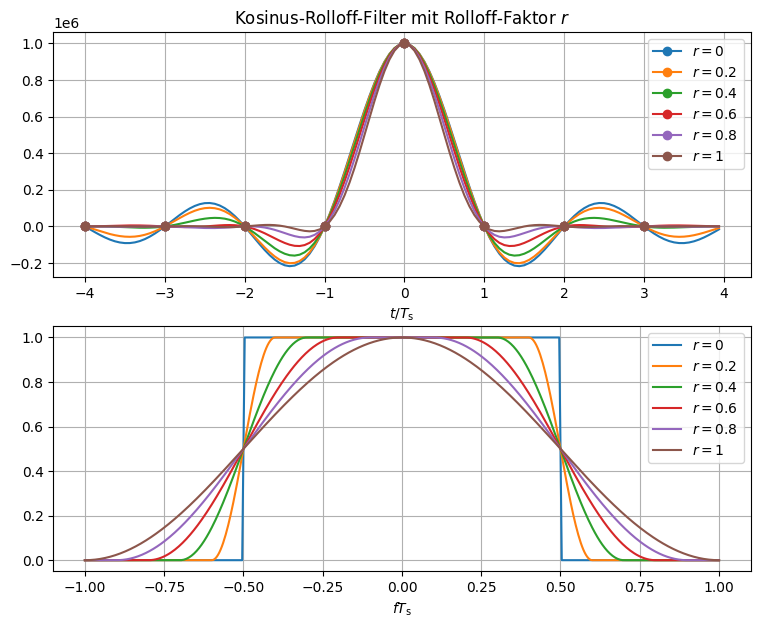

In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt

ECCpath = '../ECCpython'
if (not ECCpath==None) and (not ECCpath in sys.path):
    sys.path.append(ECCpath)

from Modulation.modulation import Modulation

# roll-off factors of raised-cosine filter
r = np.linspace(0,1,6)
# symbol duration in seconds
Ts = 1e-6
# oversampling factor
w = 16
# sampling rate in Hz
fa = w / Ts
# length of filter impulse response in samples
N_rc = 8*w

ask = Modulation(2,modulation_type='ASK')


# normalized frequency
fTs = np.linspace(-1,1,501)

g_rc = np.zeros((N_rc,len(r)))
G_rc = np.zeros((len(fTs),len(r)))
for run, R in enumerate(r):
    # impulse response
    time,g_rc[:,run] = ask.generate_g_rc(N_rc,R,Ts,fa)
    # transfer function of raised-cosine filter
    G_rc[:,run] = 0.5 * (1 + np.cos(np.pi/(2*R)*(np.abs(fTs)*2-(1-R))))
    ptr = np.argwhere(np.abs(fTs)*2<1-R)
    G_rc[ptr.flatten(),run] = 1.0
    ptr = np.argwhere(np.abs(fTs)*2>1+R)
    G_rc[ptr.flatten(),run] = 0.0

# normalized time
t_Ts = time / Ts

# suppress NaN terms for r=0 due to division by zero
G_rc[np.isnan(G_rc[:,0]),0] = 0.5
    
fig = plt.figure(figsize=(9,7))
ax1 = fig.add_subplot(211)
cntr = 0
for run in r:
    ax1.plot(t_Ts,g_rc[:,cntr], '-o', markevery=(w), label='$r=$%g' %(run))
    cntr += 1
plt.xlabel('$t/T_{\mathrm{s}}$')
plt.title('Kosinus-Rolloff-Filter mit Rolloff-Faktor $r$')
plt.grid(True)
plt.legend()

ax2 = fig.add_subplot(212)
cntr = 0
for run in r:
    ax2.plot(fTs,G_rc[:,cntr], '-', label='$r=$%g' %(run))
    cntr += 1
plt.xlabel('$fT_{\mathrm{s}}$')
#plt.title('Kosinus-Rolloff-Filter mit Rolloff-Faktor $r$')
plt.grid(True)
plt.legend()


## Matched-Filter

Das Matched-Filter ist ein an das Sendefilter angepasstes Empfangsfilter. Es maximiert das Signal-Rausch-Verhältnis am Empfangsfilterausgang. Bei Erfüllung der Matched-Filter-Bedingung besitzen Sende- und Empfangsfilter zueinander gespiegelte Impulsantworten, für den nicht-kausalen Fall gilt also 

\begin{equation}
    g_{\mathrm{S}}(t) = g_{\mathrm{E}}(-t) \; .
\end{equation}

Für reelle Impulsantworten und Übertragungsfunktionen folgt mit $g_{\mathrm{S}}(t) \to G_{\mathrm{S}}(j \omega)$ und $g_{\mathrm{E}}(t) \to G_{\mathrm{E}}(j \omega) = G_{\mathrm{S}}(-j \omega) = G_{\mathrm{S}}^*(-j \omega)$ für die Gesamtübertragungsfunktion

\begin{equation}
    G(j \omega) = G_{\mathrm{S}}(j \omega) \cdot G_{\mathrm{E}}(j \omega) 
    = |G_{\mathrm{S}}(j \omega)|^2 = |G_{\mathrm{E}}(j \omega)|^2 \; .
\end{equation}

Damit sind die  Übertragungsfunktionenen von Sende- und Empfangsfilter identisch und es gilt 

\begin{equation}
   G_{\mathrm{S}}(j \omega) = G_{\mathrm{E}}(j \omega) = \sqrt{G(j \omega)} \; .
\end{equation}

Für den idealen Tiefpass als Gesamtfilter hat die Quadratwurzel im Frequenzbereich keinen Einfluss und Sende- und Empfangsfilter sind ebenfalls ideale Tiefpässe. 
Eine Kosinus-Rolloff-Charakteristik des Gesamtsystems erhält man hingegen mit sogenannten Wurzel-Kosinus-Rolloff-Charakteristiken für Sende- und Empfangsfilter. Sie haben die Impulsantwort

\begin{equation}
    g_{\mathrm{RRC}}(t) = \frac{4 r \frac{t}{T_S} \cos \left(\pi (1+r) \frac{t}{T_S} \right) + \sin \left( \pi (1-r) \frac{t}{T_S} \right)}{\left( 1- \left(4r \frac{t}{T_S} \right)^2 \right) \pi t}
\end{equation}

und die Übertragungsfunktion 

\begin{equation}
    G_{\mathrm{RRC}}(j \omega) = 
    \begin{cases} 
        1 & \text{für } \frac{|\omega|}{\omega_{\mathrm{N}}} \leq 1-r \\
        \cos \left( \frac{\pi}{4r} \left( \frac{|\omega|}{\omega_{\mathrm{N}}} - (1-r) \right) \right)
        & \text{für } 1 - r \leq \frac{|\omega|}{\omega_{\mathrm{N}}} \leq 1+r \\
        0 & \text{für } \frac{|\omega|}{\omega_{\mathrm{N}}} \geq 1+r .
    \end{cases}
\end{equation}

Die Verläufe von Kosinus- und Wurzel-Kosinus-Rolloff-Filtern im unteren Bild verdeutlichen, dass sie die 1. Nyquist-Bedingung nicht erfüllen. Zu den idealen Abtastzeitpunkten $i T_{\mathrm{s}}$ sind die Impulsantworte nicht Null, die Filterflanken im Frequenzbereich weisen keine Punktsymmetrie zur Nyquist-Frequenz auf.



/var/folders/jq/3mc3rmqn4zb76l6_gjt5w7xw0000gn/T/ipykernel_89990/3258356670.py:9: RuntimeWarning: divide by zero encountered in scalar divide
  G_rrc[:,run] = np.cos(np.pi/(4*R)*(np.abs(fTs)*2-(1-R)))
/var/folders/jq/3mc3rmqn4zb76l6_gjt5w7xw0000gn/T/ipykernel_89990/3258356670.py:9: RuntimeWarning: invalid value encountered in multiply
  G_rrc[:,run] = np.cos(np.pi/(4*R)*(np.abs(fTs)*2-(1-R)))
/var/folders/jq/3mc3rmqn4zb76l6_gjt5w7xw0000gn/T/ipykernel_89990/3258356670.py:9: RuntimeWarning: invalid value encountered in cos
  G_rrc[:,run] = np.cos(np.pi/(4*R)*(np.abs(fTs)*2-(1-R)))


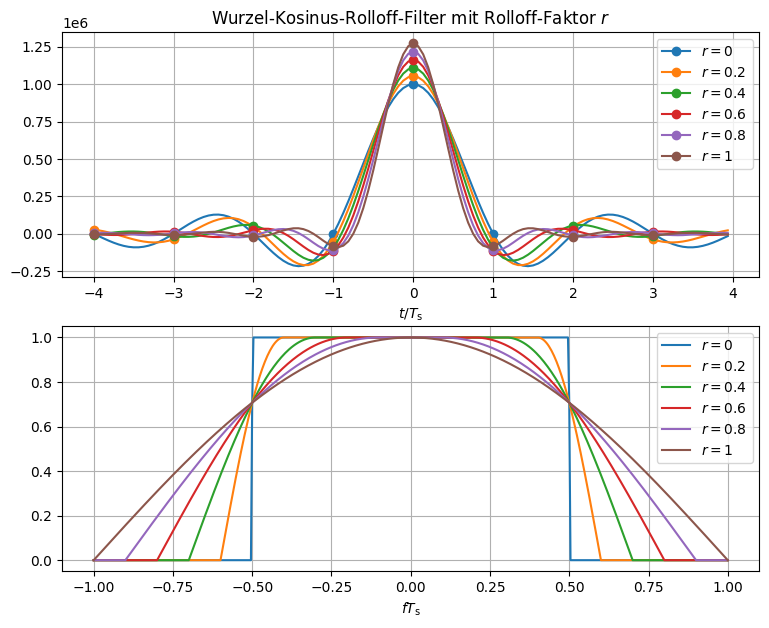

In [3]:
# root-raised-cosine filter
cntr = 0
g_rrc = np.zeros((N_rc,len(r)))
G_rrc = np.zeros((len(fTs),len(r)))
for run, R in enumerate(r):
    # impulse response
    time,g_rrc[:,run] = ask.generate_g_rrc(N_rc,R,Ts,fa)
    # transfer function of raised-cosine filter
    G_rrc[:,run] = np.cos(np.pi/(4*R)*(np.abs(fTs)*2-(1-R)))
    ptr = np.argwhere(np.abs(fTs)*2<1-R)
    G_rrc[ptr.flatten(),run] = 1.0
    ptr = np.argwhere(np.abs(fTs)*2>1+R)
    G_rrc[ptr.flatten(),run] = 0.0
    cntr += 1

# normalized time
t_Ts = time / Ts

# suppress NaN terms for r=0 due to division by zero
G_rrc[np.isnan(G_rrc[:,0]),0] = np.sqrt(0.5)
    

fig2 = plt.figure(figsize=(9,7))
ax3 = fig2.add_subplot(211)
cntr = 0
for run in r:
    ax3.plot(t_Ts,g_rrc[:,cntr], '-o', markevery=(w), label='$r=$%g' %(run))
    cntr += 1
plt.xlabel('$t/T_{\mathrm{s}}$')
plt.title('Wurzel-Kosinus-Rolloff-Filter mit Rolloff-Faktor $r$')
plt.grid(True)
plt.legend()

ax4 = fig2.add_subplot(212)
cntr = 0
for run in r:
    ax4.plot(fTs,G_rrc[:,cntr], '-', label='$r=$%g' %(run))
    cntr += 1
plt.xlabel('$fT_{\mathrm{s}}$')
#plt.title('Kosinus-Rolloff-Filter mit Rolloff-Faktor $r$')
plt.grid(True)
plt.legend()



Ein direkter Vergleich von Kosinus- und Wurzel-Kosinus-Rolloff-Filtern verdeutlicht noch einmal, dass nur die Kosinus-Rolloff-Charakteristik die 1. Nyquist-Bedingung erfüllt.

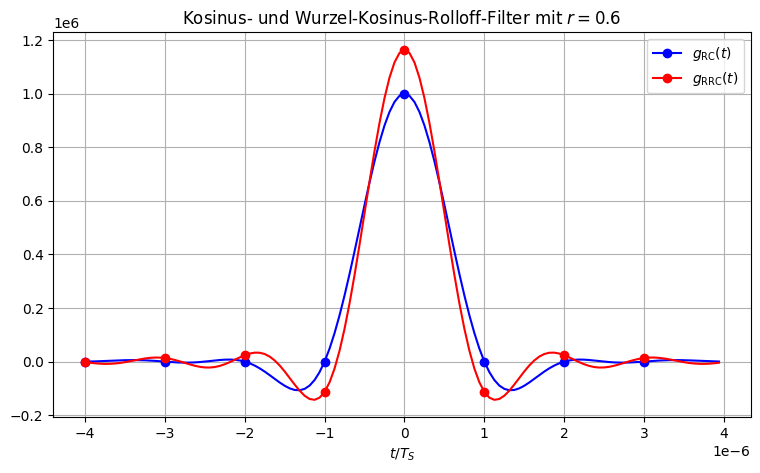

In [4]:
ptr_r = 3
fig = plt.figure(figsize=(9,5))
ax = fig.add_subplot(111)
ax.plot(time,g_rc[:,ptr_r], 'b-o', markevery=(w), label='$g_{\mathrm{RC}}(t)$')
ax.plot(time,g_rrc[:,ptr_r], 'r-o', markevery=(w), label='$g_{\mathrm{RRC}}(t)$')
plt.xlabel('$t/T_S$')
plt.title('Kosinus- und Wurzel-Kosinus-Rolloff-Filter mit $r=$%g' %(r[ptr_r]))
plt.grid(True)
plt.legend()

